In [1]:
from controlled_config import ControlledConfig
from rir_interface import taslp_RIR_Interface
from array_setup import array_setup_10cm_2mic
from locata_utils import cart2sph


import numpy as np

In [2]:
rir_interface = taslp_RIR_Interface()

snr = -5
t60 = 0.2
src_mic_dist = 1.0
noi_mic_dist = 1.0
scenario = "source_moving"
test_config = ControlledConfig(array_setup=array_setup_10cm_2mic, snr=snr, t60=t60,
                                    src_mic_dist = src_mic_dist, noi_mic_dist = noi_mic_dist, 
                                    nb_points=16, same_plane=True)

for idx in range(0, 1):									
    retry_flag = True
    retry_count = 0
    while(retry_flag):
        try:
            static_config_dict = test_config._create_acoustic_scene_config("Static")
            circular_motion_config_dict = test_config._create_acoustic_scene_config("CircularMotion", scenario)
            retry_flag = False
        except AssertionError:
            retry_flag = True
            retry_count += 1	

config_dict = circular_motion_config_dict
room_sz = config_dict['room_sz']
array_pos = config_dict['array_pos']
mic_pos = config_dict['mic_pos']
traj_pts= config_dict['src_traj_pts']
noise_pos= config_dict['noise_pos']
T60= config_dict['t60']
SNR= config_dict['snr']		

### Mapping config pos to keys of rir (Interface)

src_azimuth = np.degrees(cart2sph(traj_pts - array_pos)[:,2])
src_azimuth_keys = np.round(np.where(src_azimuth<0, 360+src_azimuth, src_azimuth)).astype('int32')	

source_rirs, dp_source_rirs = rir_interface.get_rirs(t60=T60, idx_list=list(src_azimuth_keys))

noi_azimuth = np.degrees(cart2sph(noise_pos - array_pos)[:,2])
noi_azimuth_keys = np.round(np.where(noi_azimuth<0, 360+noi_azimuth, noi_azimuth)).astype('int32')	
noise_rirs, _ = rir_interface.get_rirs(t60=T60, idx_list=list(noi_azimuth_keys))


In [6]:
src_azimuth, source_rirs.shape


(array([  86.,   94.,  102.,  110.,  118.,  126.,  134.,  142.,  149.,
         157.,  165.,  173., -179., -171., -163., -155.]),
 (16, 2, 4224))

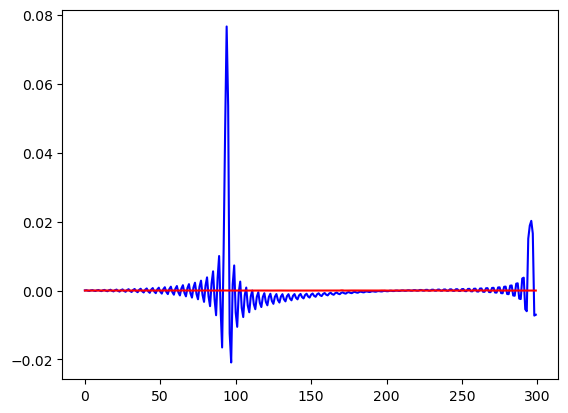

In [4]:
import matplotlib.pyplot as plt

plt.plot(source_rirs[0,0,:300],'b')
plt.plot(source_rirs[0,1,:300],'r')

In [7]:
source_rirs_86, dp_source_rirs_86 = rir_interface.get_rirs(t60=T60, idx_list=[86])

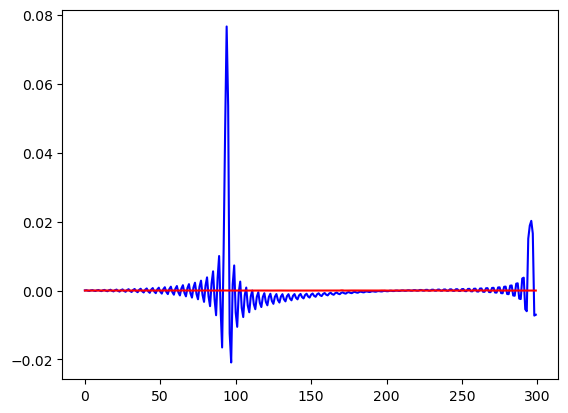

In [9]:
plt.plot(source_rirs_86[0,0,:300],'b')
plt.plot(source_rirs_86[0,1,:300],'r')

In [10]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

t_60 = 0.2
files_list = f'/scratch/bbje/battula12/Databases/RIRs/taslp_roomdata_360_resolution_1degree/HABET_SpacedOmni_8x8x3_height1.5_dist1_roomT60_{t60}.mat'
rir = sio.loadmat(files_list)
_h = rir['trainingroom']

In [19]:
h = _h[0,86][0]
h.shape

(4224, 2)

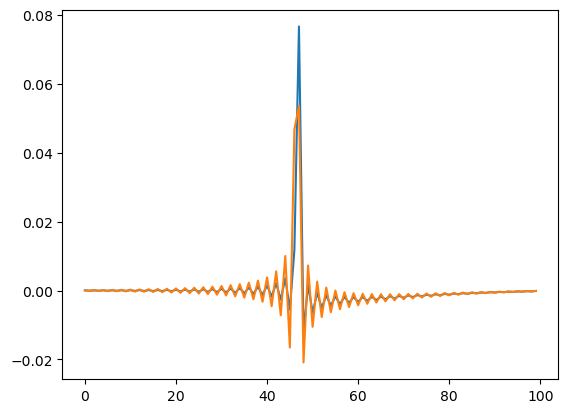

In [12]:
plt.plot(h[:100,0])
plt.plot(h[:100,1])

In [30]:

x = np.array(_h.tolist()).squeeze()
x_1 = np.transpose(x,(0,2,1))
#x = x.astype('float32')

In [32]:
x.shape, x_1.shape

((361, 4224, 2), (361, 2, 4224))

In [35]:
np.sum(x[86,:,0]**2), np.sum(x[86,:,1]**2), np.sum(x_1[86,0,:]**2), np.sum(x_1[86,1,:]**2)

(0.0076975921717922086,
 0.007727222301348132,
 0.0076975921717922086,
 0.007727222301348132)

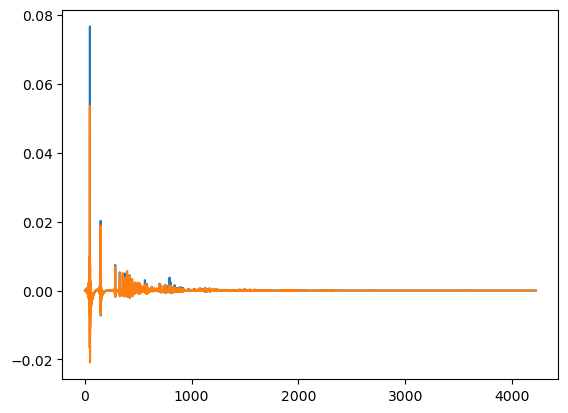

In [27]:
plt.plot(x[86,:,0])
plt.plot(x[86,:,1])